In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno 
import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
#Mostrar 10000 filas y 100 columnas como maximo
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [3]:
# specify encoding to deal with different formats
df = pd.read_csv("/kaggle/input/ecommercedata/ecommercedata.csv", encoding = 'ISO-8859-1')

In [4]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
# Cambiar el nombre de las columnas
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

<h1>Limpieza de datos</h1>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
#verificar si hay valores perdidos
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [8]:
#Verificar si hay filas con al menos un dato nulo
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
# Añadir formato de fecha 
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [10]:
# cambiar la descripcion de producto a lower case
df['description'] = df.description.str.lower()

In [11]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h1>Eliminar los datos nulos</h1>

In [12]:
# Nuevo dataframe sin los valores perdidos 
df_new = df.dropna()

In [13]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [15]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


<h1>Quitar valores negativos</h1>

In [16]:
# Obtener las columnas numéricas del DataFrame
columnas_numericas = df.select_dtypes(include=[int, float]).columns

# Verificar si hay valores negativos en las columnas numéricas
hay_negativos = (df[columnas_numericas] < 0).any().any()

# Imprimir el resultado
if hay_negativos:
    print("El DataFrame contiene valores negativos.")
else:
    print("El DataFrame no contiene valores negativos.")

El DataFrame contiene valores negativos.


In [17]:
df_new = df_new[df_new.quantity > 0]

<h1>Agregar columna amount_spent</h1>

In [18]:
#Multiplicar la cantidad con el precio unitario para obtener el gasto total
df_new['amount_spent']=df_new['quantity']*df_new['unit_price']

In [19]:
#Unir la columna amount_spent generada al dataframe
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

<H1>Separa la columna fecha en año - mes - dia</H1>

In [20]:
df_new.insert(loc=2, column='year_month', value=df_new['invoice_date'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.invoice_date.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.invoice_date.dt.hour)

In [21]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


<H1>ANALISIS EXPLORATORIO DE DATOS (EDA)</H1>

¿Cuantos pedidos son realizados por los clientes?

In [22]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


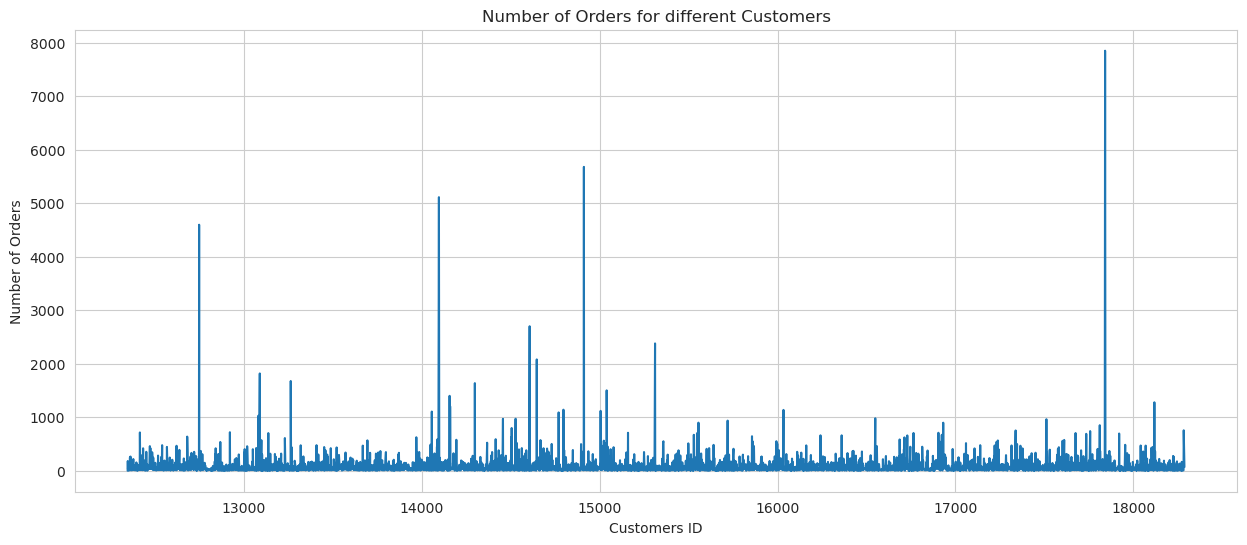

In [23]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

¿Quienes son los 10 clientes que compran más?

In [24]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


<h1>¿Cuanto dinero gastó cada cliente?</h1>

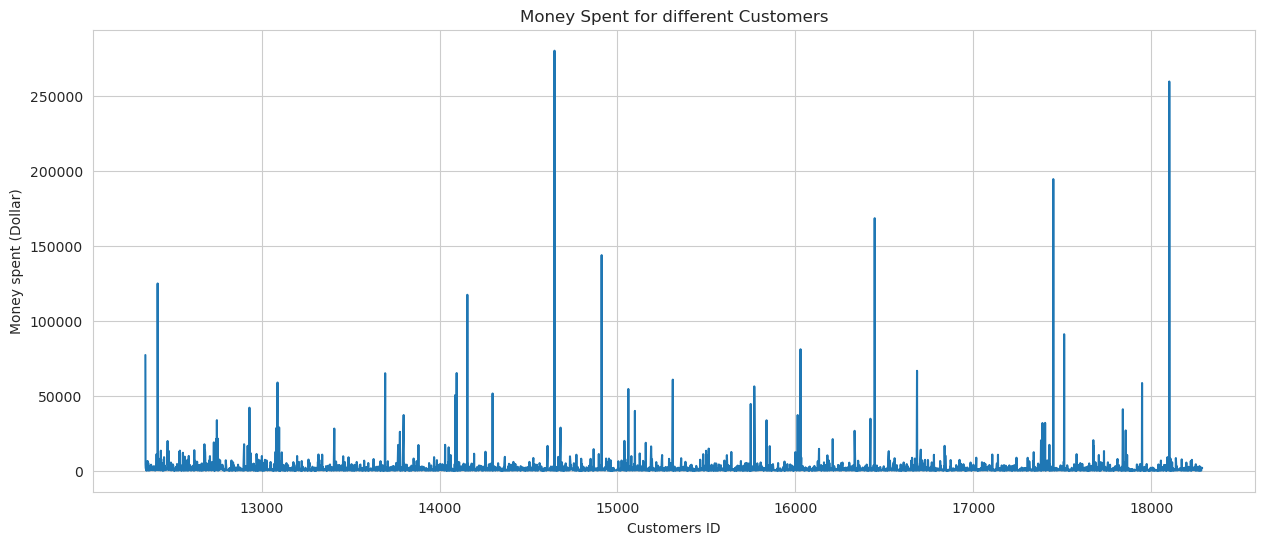

In [25]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [26]:
#Top 10 clientes que gastaron mas dinero
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


<h1>¿Cuantas ordenes por meses hubieron?</h1>

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


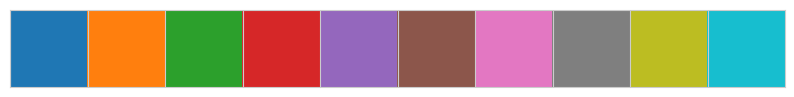

In [27]:
# color available
sns.palplot(color)
df_new.head()

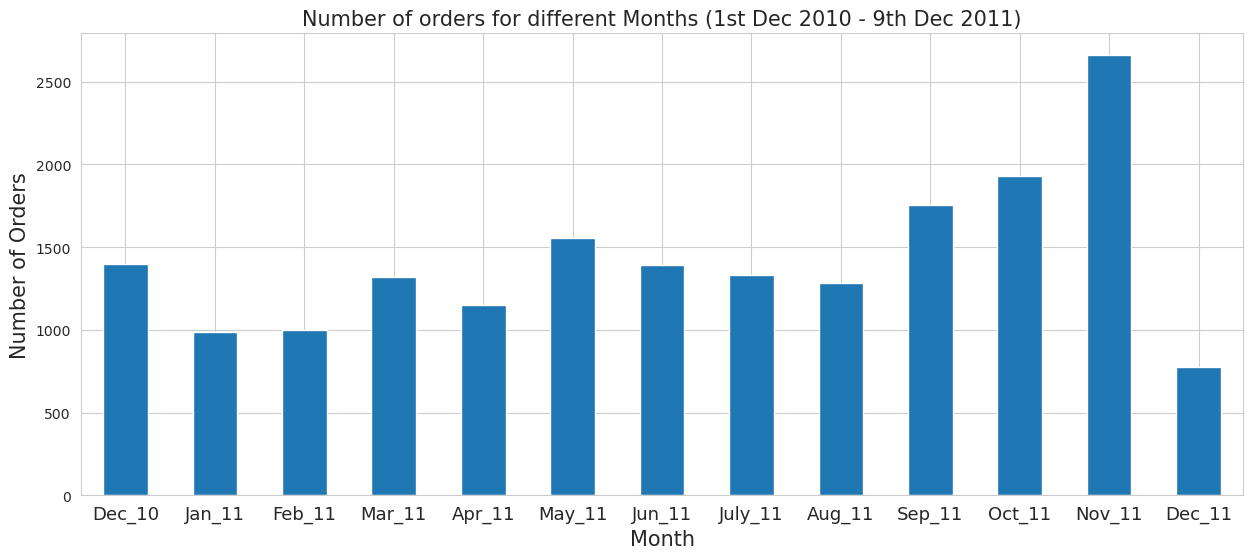

In [28]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color=color[0], figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11', 'Dec_11'), rotation='horizontal', fontsize=13)
plt.show()


<h1>¿Cuantas ordenes por día hubieron?</h1>

In [29]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

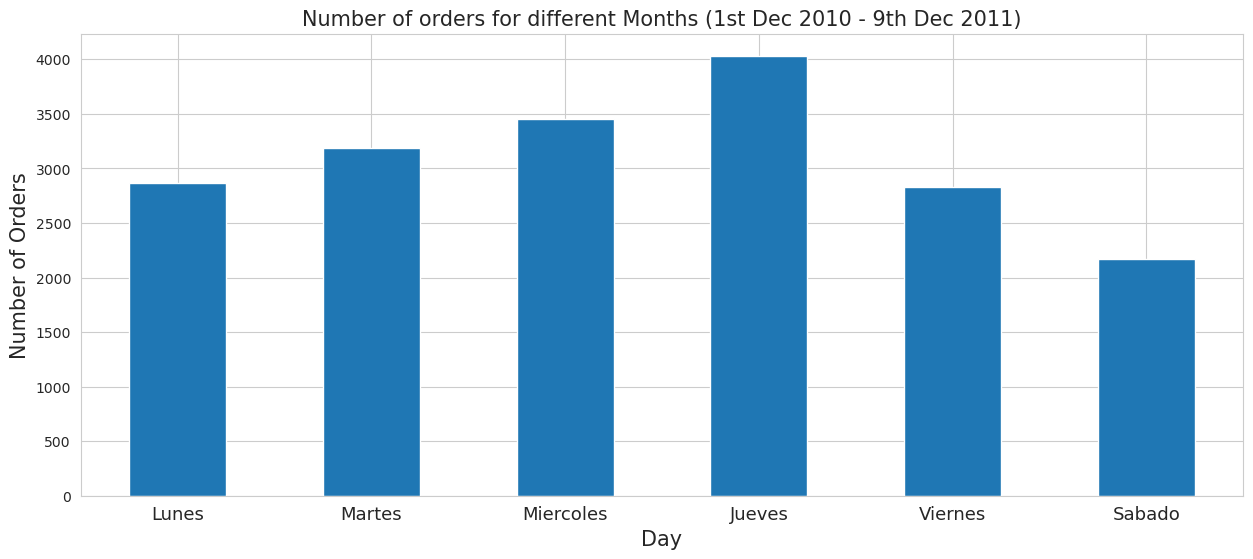

In [30]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar', color=color[0], figsize=(15,6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado'), rotation='horizontal', fontsize=13)
plt.show()


<h1>Descubrir patrones por cada país</h1>

In [31]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850.0,United Kingdom


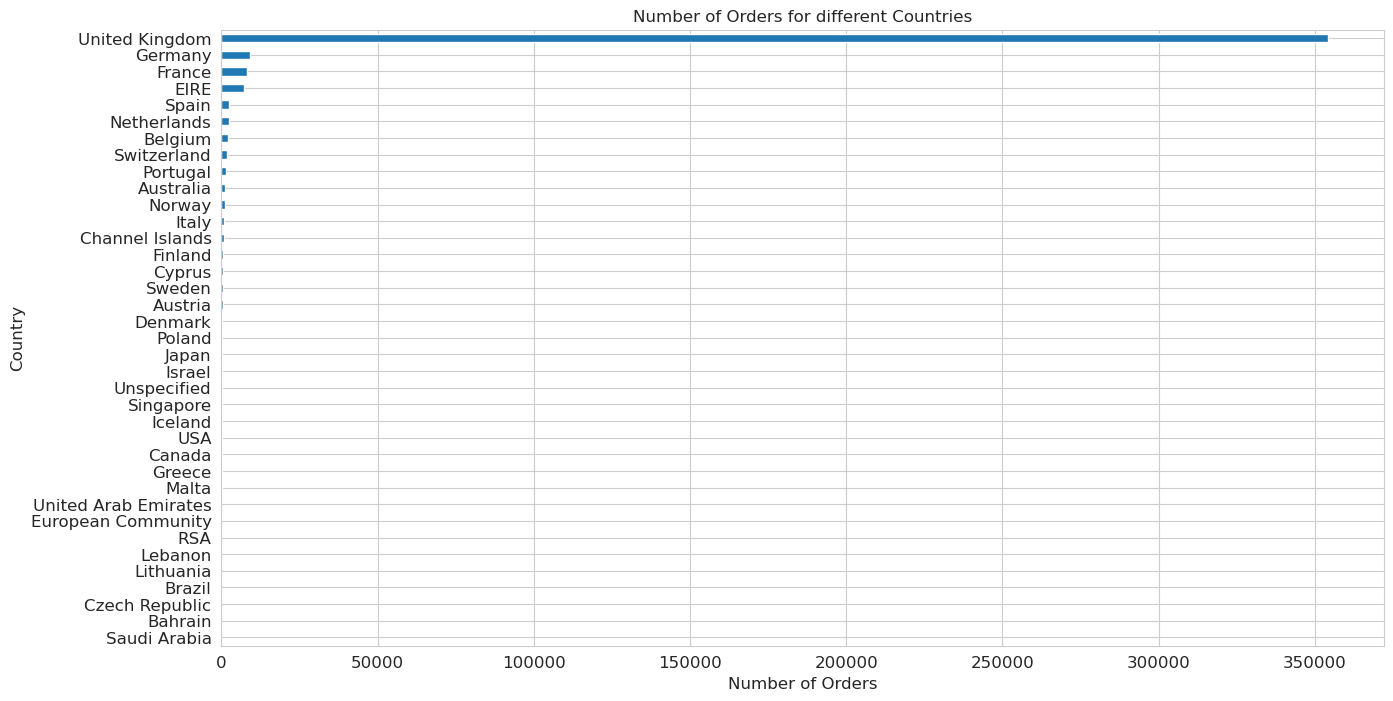

In [32]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

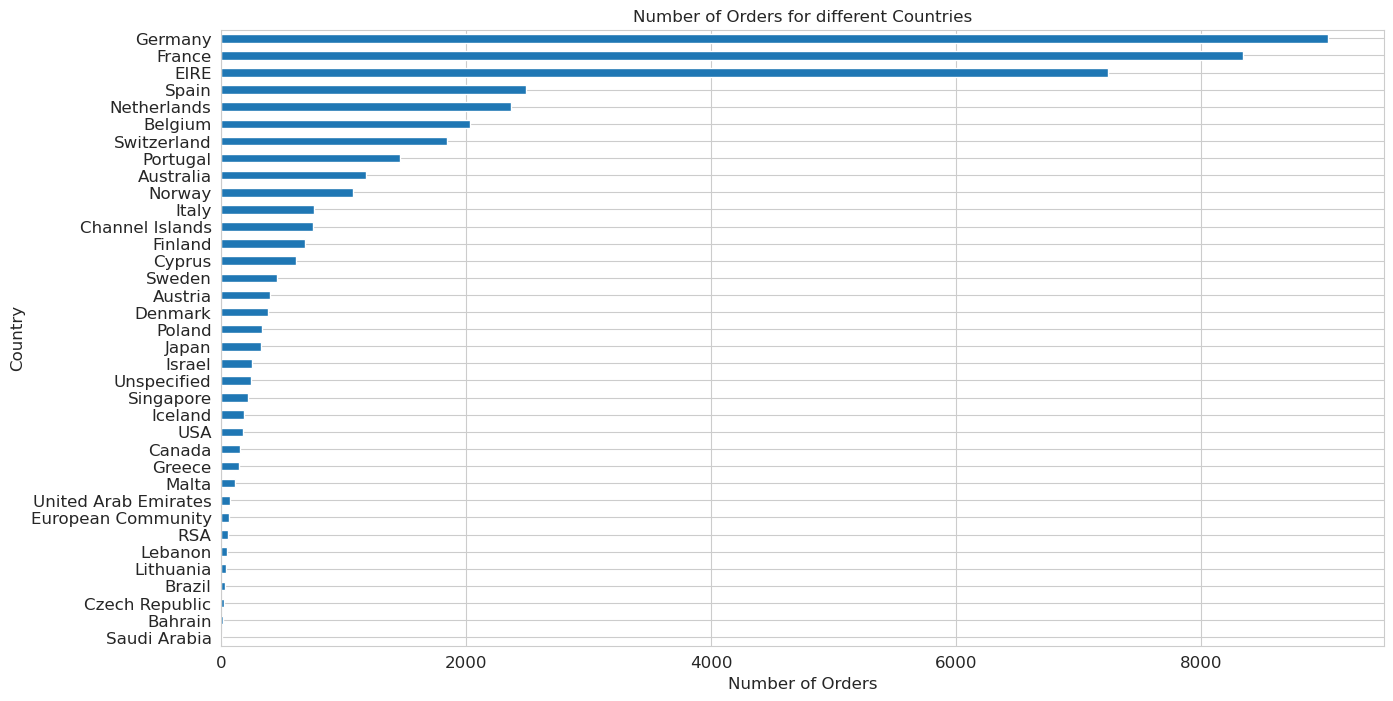

In [33]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

<h1>¿Cuanto dinero gastan por pains?</h1>

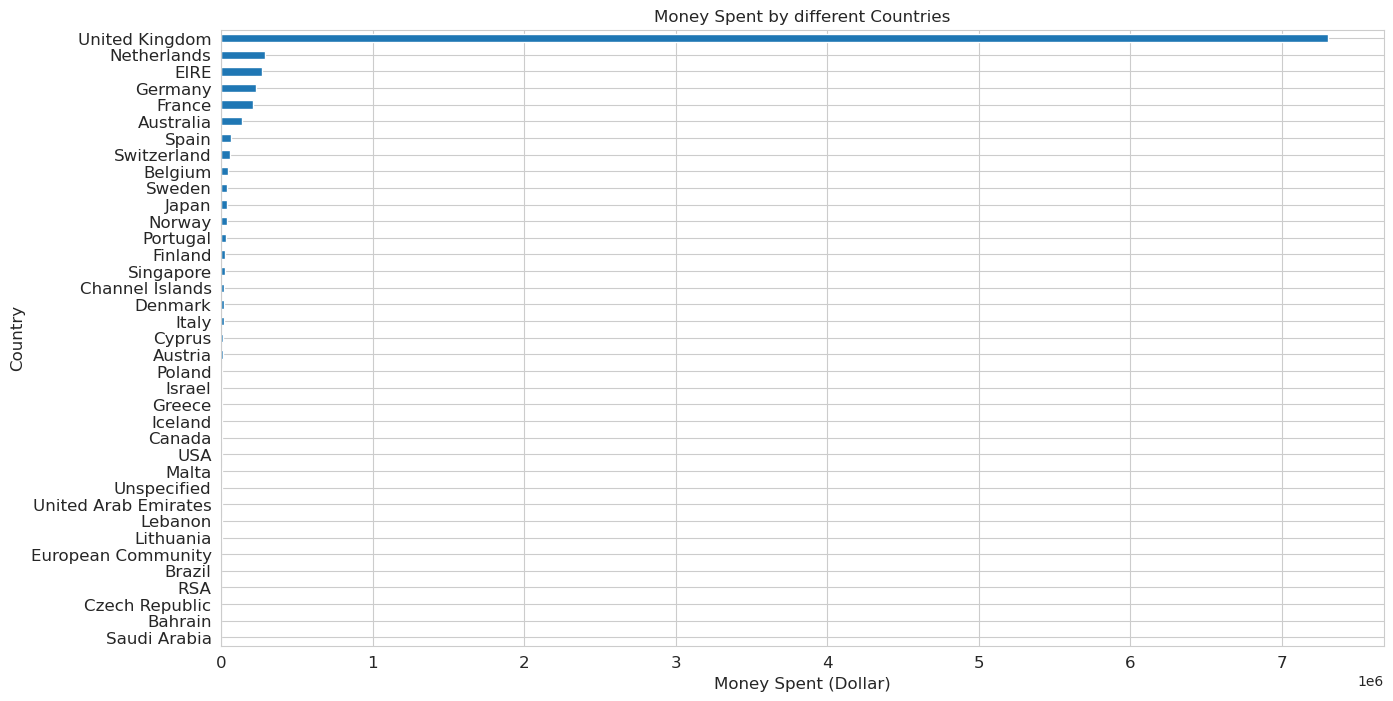

In [34]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

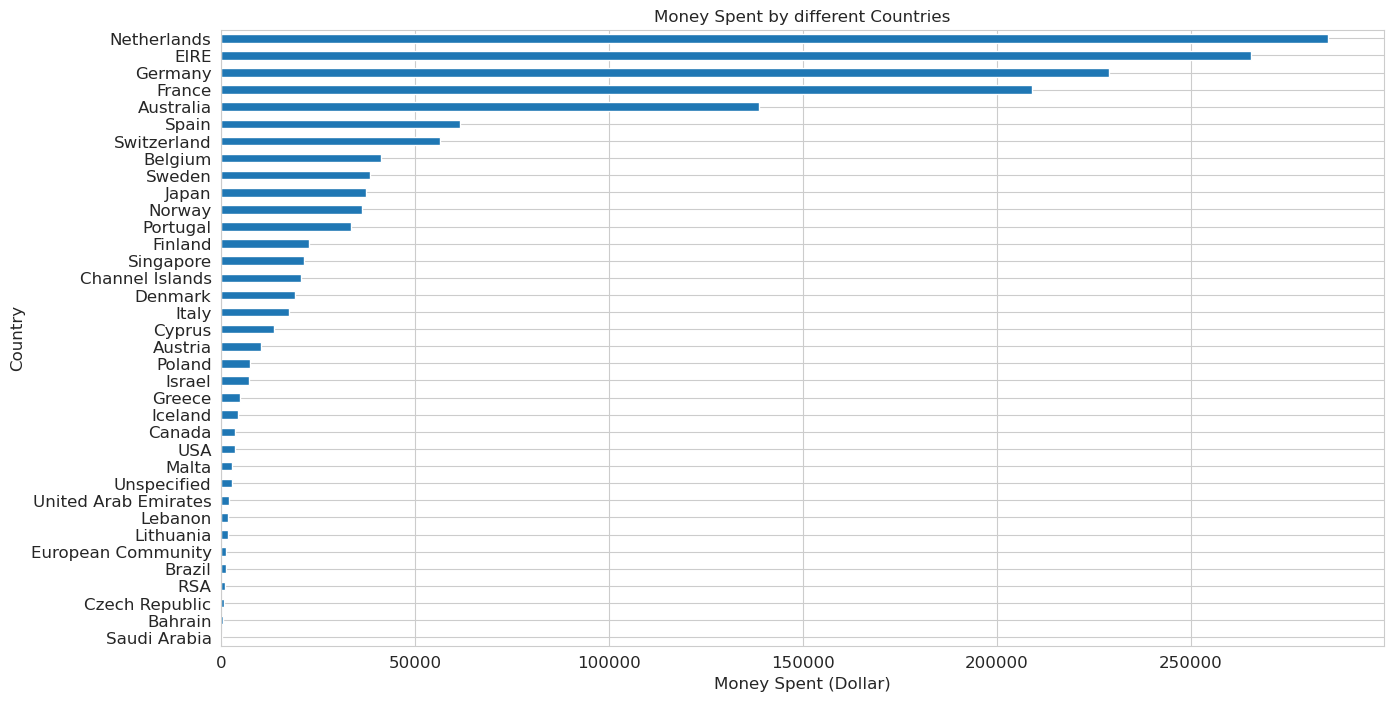

In [35]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()